In [3]:
import torch

<h6><i>Тензор</i> - это многомерный вектор, например:</h6>
<h6>x = np.array([1, 2, 3]) - вектор = тензор с 1 размерностью(точнее: (3,))</h6>
<h6>y = np.array([[1, 2, 3], [4, 5, 6]]) - матрица = тензор с двумя измерениями ((2, 3) в данном случае)

### Создание тензора

In [2]:
a = torch.FloatTensor([1, 2]) # float32
print(a)
a.shape

tensor([1., 2.])


torch.Size([2])

In [3]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
print(b)
b.shape

tensor([[1., 2., 3.],
        [4., 5., 6.]])


torch.Size([2, 3])

In [4]:
x = torch.FloatTensor(2,3,4)
x

tensor([[[-2.9625e-07,  4.5733e-41, -2.9625e-07,  4.5733e-41],
         [ 1.4013e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 7.7056e-36,  0.0000e+00,  2.5852e-36,  0.0000e+00],
         [ 8.2309e-16,  4.5733e-41,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])

In [5]:
x = torch.FloatTensor(100)
x.shape

torch.Size([100])

In [6]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

##### Если создавать torch,Tensor то генерируются случайные числа

### Инициализация тензоров

In [7]:
x1 = torch.FloatTensor(3, 2, 4)
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)
x3

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
x = torch.randn((2, 3))
x

tensor([[ 0.9476, -0.2932, -0.8543],
        [ 1.5106, -0.4305,  1.9627]])

In [9]:
x.random_(0, 10) # Дискретное равномерное
x.uniform_(0, 1) # Равномерное
x.normal_(mean=0, std=1)  # норм распределение со средним 0 и дисперсией 1
x.bernoulli_(p=0.5)

tensor([[0., 0., 0.],
        [0., 1., 0.]])

### Изменение формы
##### np.reshape() == torch.view()

b

In [10]:
b.view(3, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [11]:
b, b.stride()

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 (3, 1))

In [12]:
b.reshape(6, 1)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]])

### Изменение типа тензора

In [16]:
a = torch.FloatTensor([1.5, 3.2, -7])
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [17]:
a.to(torch.int32)

tensor([ 1,  3, -7], dtype=torch.int32)

  ### Фиктивные оси

In [25]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a[:, None, :].shape

torch.Size([3, 1, 3])

In [27]:
a[:, :, None]

tensor([[[  1.],
         [  2.],
         [  3.]],

        [[ 10.],
         [ 20.],
         [ 30.]],

        [[100.],
         [200.],
         [300.]]])

In [35]:
def vertical_means(A):
    """
    param A: torch.tensor[m,n]
    """
    rows = A.shape[0]
    columns = A.shape[1]
    for col in range(columns):
         print(A[:, col].mean())
    
vertical_means(torch.FloatTensor([[2, 2, 3], [3, 4, 5]]))
            
    

tensor(2.5000)
tensor(3.)
tensor(4.)


In [39]:
def vertical_means(A):
    """
    param A: torch.tensor[m,n]
    """
    result = A.mean(dim=0)
    return result
    
A = torch.FloatTensor([[2, 2, 3], [3, 4, 5]])
vertical_means(A)            

tensor([2.3333, 4.0000])

In [57]:
def normalize_pictures(A):
    """
    param A: torch.Tensor[batch_size, num_channels, width, heigth]
    """
    m = A.mean(dim=(2, 3))
    sigma = A.std(dim=(2, 3))
    result = (A - m[:, :, None, None])/sigma[:, :, None, None]
    return result

batch = torch.randint(0, 156, (64, 3, 300, 300), dtype=torch.float32)
batch.mean(dim=(2,3)) # .shape
normalize_pictures(batch).std()

tensor(1.0000)

### Матричные операции

In [58]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [59]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

In [60]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

### Скалярное произведение векторов

In [61]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [63]:
a.shape, b.shape

(torch.Size([6]), torch.Size([6]))

In [64]:
 a @ b

tensor(-141.)

In [65]:
type(a)

torch.Tensor

In [66]:
type(a @ b)

torch.Tensor

### Матричное произведение

In [68]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [-100, -200, -300]])
a.mm(b)

tensor([[  -321.,   -642.,   -963.],
        [ -3210.,  -6420.,  -9630.],
        [-32100., -64200., -96300.]])

In [69]:
a @ b

tensor([[  -321.,   -642.,   -963.],
        [ -3210.,  -6420.,  -9630.],
        [-32100., -64200., -96300.]])

In [73]:
b = torch.FloatTensor([[-1], [-10], [100]])
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [14]:
def forward_pass(X, w):
    result = torch.sigmoid(X @ w)
    
    
    return result

In [15]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
print(X)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w)
forward_pass(X, w)

tensor([[-5.,  5.],
        [ 2.,  3.],
        [ 1., -1.]])
tensor([[-0.5000],
        [ 2.5000]])


tensor([[1.0000],
        [0.9985],
        [0.0474]])

# CPU(Central Processing Unit) and GPU(Graphical Processing Unit)

In [29]:
x = torch.FloatTensor(1024, 10024).uniform_()
x.is_cuda

False

### Кладем тензор на GPU

In [35]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
x = x.to(device)
x

tensor([[3.4680e-01, 6.6231e-03, 3.4280e-01,  ..., 9.1482e-01, 7.0420e-01,
         9.4229e-01],
        [3.9376e-01, 5.4366e-02, 4.2599e-01,  ..., 2.1922e-01, 8.5599e-01,
         9.1246e-01],
        [9.4693e-01, 3.7408e-02, 6.6948e-01,  ..., 8.8969e-01, 8.5006e-01,
         6.7643e-02],
        ...,
        [4.6188e-01, 3.8083e-01, 1.4788e-01,  ..., 5.5873e-01, 9.0728e-01,
         2.6053e-01],
        [2.7966e-01, 9.7320e-01, 4.0463e-02,  ..., 3.2975e-01, 1.6889e-02,
         4.1528e-01],
        [6.9989e-01, 2.7685e-01, 9.2682e-01,  ..., 4.5580e-04, 2.6526e-01,
         3.9658e-01]])

In [36]:
x = torch.FloatTensor(5, 5, 5).uniform_()
if torch.cuda.is_available():
    # получить имя устройства CUDA
    device = torch.device('cuda')
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to('cpu', torch.double))
    

### Реализуем обучение в логистической регрессии

/home/yunost/Desktop/github/Deep-Learning/jupyterenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets in

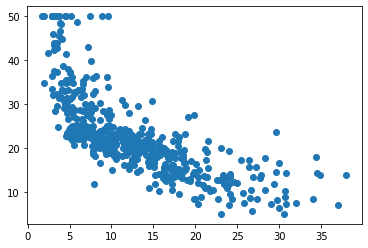

In [1]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target[:])

In [14]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [15]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagate gradients
loss.backward()

In [16]:
print('dL/dw =', w.grad)
print('dL/db =', b.grad)

dL/dw = tensor([-47.3514])
dL/db = tensor([-45.0656])


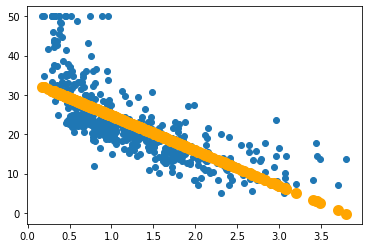

loss =  38.668156


In [18]:
from IPython.display import clear_output

for i in range(100):
    y_pred = w * x + b
    print(f'y_pred = {y_pred[0:5]}')
    
    loss = torch.mean((y_pred - y)**2)
    print(f'loss = {loss}')
    # Вычисляем градиенты
    loss.backward()
    print(f'w.grad = {w.grad}')
    print(f'b.grad = {b.grad}')
    
    # Делаем шаг градиентного спуска
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad
    
    # обнуляем градиенты
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()
        
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done")

## Градиенты на примере двухслойной сети

In [23]:
dtype = torch.float

# N - размер батча; D_in - входной размер;
# H - размер скрытого слоя; D_out - размер вывода.
N, D_in, H, D_out = 64, 3, 3, 10

# Создание случайных тензоров для хранения входных и выходных данных.
# Настройка requires_grad = False указывает, что там не нужно вычилсять градиенты
# по отношению к этим тензорам во время обратного прохода.

x = torch.randn(N, D_in, dtype=dtype)
x

tensor([[ 0.7133, -2.5698, -1.0160],
        [ 1.4949, -0.3236, -0.0401],
        [ 0.5315, -1.8467,  1.0078],
        [-0.1714, -0.9581, -0.1195],
        [-1.8249,  0.9174, -0.9657],
        [-1.1005,  0.0445, -0.0786],
        [-1.4305,  0.7234, -0.3138],
        [ 1.5604,  0.8829, -0.4660],
        [ 0.2909,  0.7218,  0.3106],
        [ 0.3395,  1.1035,  0.1245],
        [ 1.9215, -2.1267, -0.4481],
        [-0.3900, -0.0581,  0.6348],
        [-1.0654,  0.5134, -0.0935],
        [-1.7016,  1.8267, -0.7347],
        [ 1.8316,  1.4852,  1.2300],
        [-0.8263,  1.4787,  1.2442],
        [-0.2822,  2.1601, -1.2710],
        [-0.4489,  1.0921,  1.0067],
        [ 0.5285, -0.5742, -0.0413],
        [-1.4423,  1.9570,  0.1974],
        [-1.3577,  1.3331, -0.6931],
        [-0.1237,  0.5102, -0.6693],
        [ 1.3191, -1.5710, -0.8810],
        [-0.5310,  0.4723,  0.5133],
        [-0.3846, -0.6207, -1.1586],
        [-0.4453, -0.4542,  1.7067],
        [-1.1195,  0.6644, -1.6216],
 